**Train Model nhận diện khẩu trang sử dụng Pretrain model VGG19 của Keras trên bộ dữ liệu Face Mask 12K Images Dataset từ Kaggle.**






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance
import os 
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Load train and test set
train_dir = '/content/drive/MyDrive/BigData/dataset/Face Mask Dataset/Train'
test_dir = '/content/drive/MyDrive/BigData/dataset/Face Mask Dataset/Test'
val_dir = '/content/drive/MyDrive/BigData/dataset/Face Mask Dataset/Validation'

In [ ]:
# Data augmentation


train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32, shuffle=False)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=test_dir,target_size=(128,128),class_mode='categorical',batch_size=32, shuffle=False)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


Building VGG19 transfer learning model.

In [ ]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [ ]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
9/9 [==============================] - 64s 7s/step - loss: 0.5648 - accuracy: 0.6875
Epoch 2/20
9/9 [==============================] - 26s 3s/step - loss: 0.2550 - accuracy: 0.9236
Epoch 3/20
9/9 [==============================] - 25s 3s/step - loss: 0.1856 - accuracy: 0.9236
Epoch 4/20
9/9 [==============================] - 22s 3s/step - loss: 0.1401 - accuracy: 0.9479
Epoch 5/20
9/9 [==============================] - 25s 3s/step - loss: 0.0948 - accuracy: 0.9826
Epoch 6/20
9/9 [==============================] - 26s 3s/step - loss: 0.0751 - accuracy: 0.9931
Epoch 7/20
9/9 [==============================] - 22s 3s/step - loss: 0.1165 - accuracy: 0.9514
Epoch 8/20
9/9 [==============================] - 21s 2s/step - loss: 0.0913 - accuracy: 0.9757
Epoch 9/20
9/9 [==============================] - 19s 2s/step - loss: 0.0737 - accuracy: 0.9861
Epoch 10/20
9/9 [==============================] - 16s 2s/step - loss: 0.0857 - accuracy: 0.9757
Epoch 11/20
9/9 [======================

In [ ]:
loss, acc = model.evaluate(test_generator)
print("Loss: ", loss)
print("Accuracy: ", acc)

32/32 [==============================] - 168s 5s/step - loss: 0.0556 - accuracy: 0.9830
Loss:  0.05559169128537178
Accuracy:  0.9830339550971985


Classification Report
              precision    recall  f1-score   support

    WithMask       0.98      0.99      0.98       493
 WithoutMask       0.99      0.98      0.98       509

    accuracy                           0.98      1002
   macro avg       0.98      0.98      0.98      1002
weighted avg       0.98      0.98      0.98      1002

Confusion Matrix


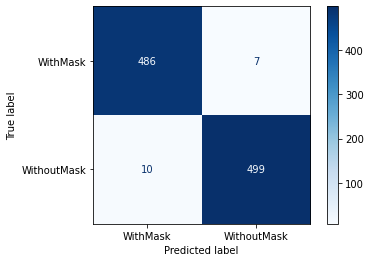

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = model.predict(test_generator,len(test_generator) // 33)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)

print('Classification Report')
target_names = ['WithMask', 'WithoutMask']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Save the model.

In [ ]:
model.save('/content/drive/MyDrive/BigData/model/VGG19/masknet_vgg19.h5')